In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)
df.drop(columns=['Unnamed: 0'], inplace=True)  # drop index column if present
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


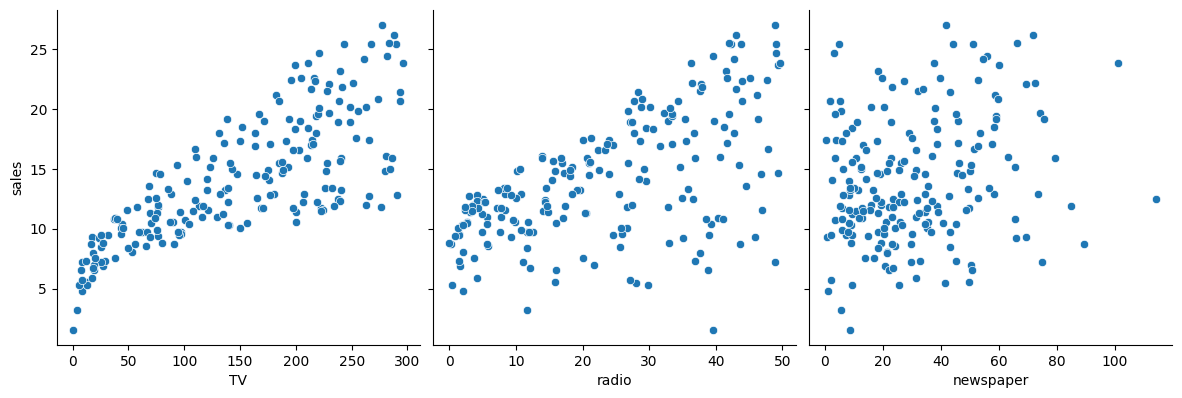

In [8]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', kind='scatter', height=4)
plt.show()

In [12]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

MSE: 1.9918855518287906
R² score: 0.8927605914615384


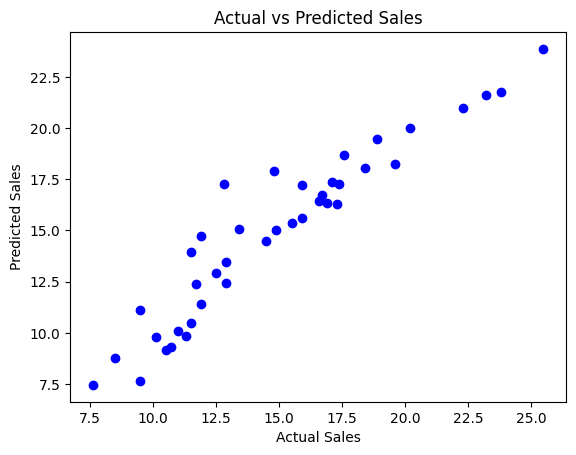

In [14]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

# Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [15]:
coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeffs)

print("Intercept:", model.intercept_)


           Coefficient
TV            0.046843
radio         0.178544
newspaper     0.002586
Intercept: 2.907947020816433


In [18]:

y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 1.0402154012924718
MSE 1.9918855518287906
R2 score 0.8927605914615384


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


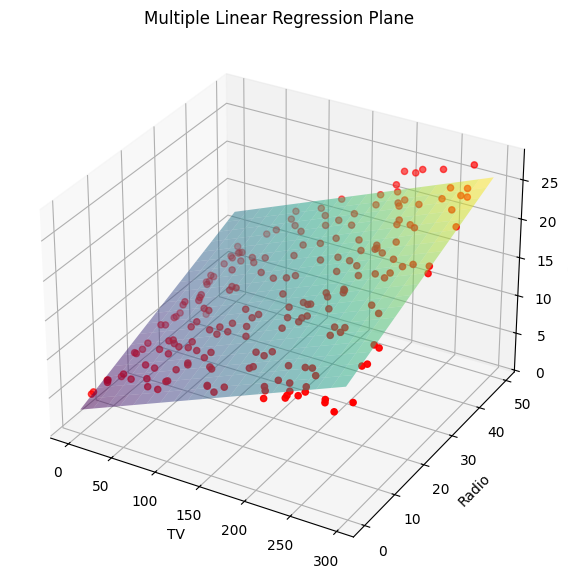

In [23]:


from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Load and prepare data
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)
df = df[['TV', 'radio', 'sales']]  # only use 2 features for 3D plot

X = df[['TV', 'radio']]
y = df['sales']

# Train model
model = LinearRegression()
model.fit(X, y)

# Create grid for 3D plane
tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 20)
radio_range = np.linspace(X['radio'].min(), X['radio'].max(), 20)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Predict over grid
X_grid = np.c_[tv_grid.ravel(), radio_grid.ravel()]
sales_pred = model.predict(X_grid).reshape(tv_grid.shape)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual points
ax.scatter(X['TV'], X['radio'], y, c='red', label='Actual')

# Plot regression plane
ax.plot_surface(tv_grid, radio_grid, sales_pred, alpha=0.5, cmap='viridis', label='Regression Plane')

# Labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('Multiple Linear Regression Plane')

plt.show()
